Prachee Prasad, 381060

**DL LAB 4**

Time series prediction using RNN – stock market analysis or weather forecasting.

Problem: Google Stock Price Prediction

In [1]:
# Install kagglehub
!pip -q install kagglehub

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
# Download dataset
path = kagglehub.dataset_download("rahulsah06/gooogle-stock-price")
print("Dataset files downloaded to:", path)

# Load CSVs
train_path = f"{path}/Google_Stock_Price_Train.csv"
test_path  = f"{path}/Google_Stock_Price_Test.csv"

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()

100%|██████████| 23.4k/23.4k [00:00<00:00, 41.6MB/s]

Extracting files...
Dataset files downloaded to: /root/.cache/kagglehub/datasets/rahulsah06/gooogle-stock-price/versions/1
Train shape: (1258, 6)
Test shape: (20, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
#Preprocessing
# Use only "Open" column
training_set = train_df[['Open']].values

# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
training_scaled = scaler.fit_transform(training_set)

# Create X_train, y_train (60 days → next day)
X_train, y_train = [], []
for i in range(60, len(training_scaled)):
    X_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape for LSTM [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (1198, 60, 1)
y_train shape: (1198,)


In [6]:
#Build LSTM

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)  # Prediction of next Open price
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#train
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.1247
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0059
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0049
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0043
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0051
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0051
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0038
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0041
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0049
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0039
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0035
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0035
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0035
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0035
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0041
Epoc

In [8]:
#Prepare test data

dataset_total = pd.concat((train_df['Open'], test_df['Open']), axis=0)

inputs = dataset_total[len(dataset_total) - len(test_df) - 60:].values
inputs = inputs.reshape(-1,1)
inputs_scaled = scaler.transform(inputs)

X_test = []
for i in range(60, 60 + len(test_df)):
    X_test.append(inputs_scaled[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [10]:
#Predict

predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Actual prices
real_stock_price = test_df[['Open']].values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


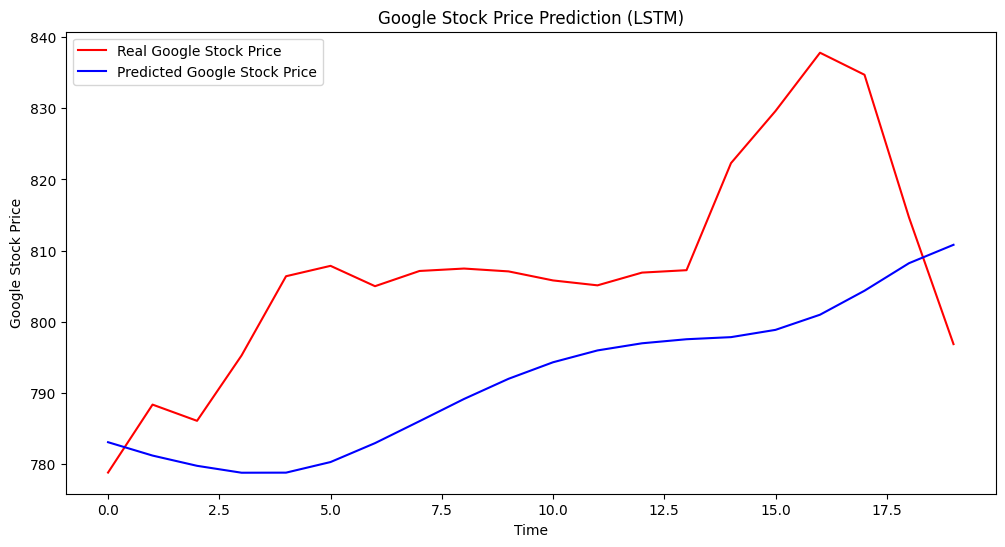

In [11]:
#Visualisation

plt.figure(figsize=(12,6))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [12]:
#Predict next day price

last_60 = inputs_scaled[-60:]
last_60 = last_60.reshape(1, 60, 1)
tomorrow_pred = model.predict(last_60)
print("Predicted next day Open price:", scaler.inverse_transform(tomorrow_pred)[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
Predicted next day Open price: 810.85864
